In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
from pandas import read_csv
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from pandas import DataFrame
from sklearn.metrics import accuracy_score
from pandas import read_csv


In [2]:
x = read_csv('train.csv')
x.shape

(42000, 785)

In [5]:
y = x['label']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline ([("scaler", StandardScaler()),("svm_clf", SVC(kernel="poly",degree=3,coef0=1,C=5))])
poly_kernel_svm_clf.fit(X_train,y_train)

/opt/conda/envs/tf2/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/tf2/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/opt/conda/envs/tf2/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [7]:
pred = poly_kernel_svm_clf.predict(X_test)

/opt/conda/envs/tf2/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [8]:
print("accuracy: " + str(accuracy_score(pred,y_test)))

accuracy: 0.9834126984126984


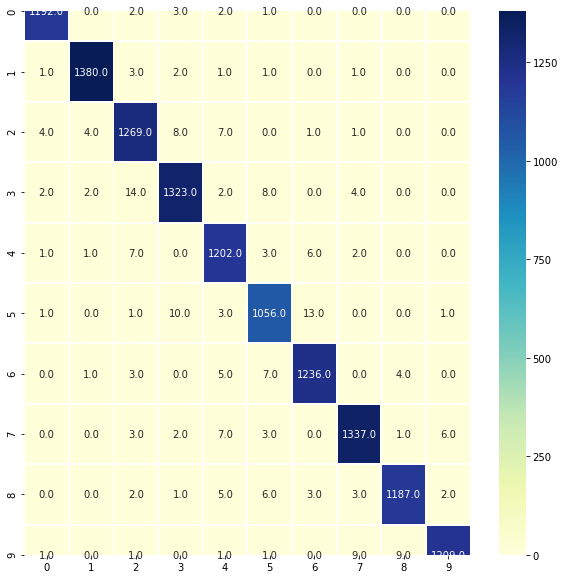

In [9]:
plt.figure(figsize=(10,10))
conf = confusion_matrix(y_test,pred)
# df = DataFrame(data=conf)
ax = sns.heatmap(conf,fmt=".1f",annot=True, linewidths=.9,cmap="YlGnBu")
#pour regler le probléme de thuncat == !pip install matplotlib==3.1.0

In [10]:
pca_dims = PCA()
pca_dims.fit(X_train)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [11]:
d

153

In [12]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)

X_recovered = pca.inverse_transform(X_reduced)

In [13]:
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

reduced shape: (29400, 153)
recovered shape: (29400, 785)


In [16]:
poly_kernel_svm_clf = Pipeline ([("scaler", StandardScaler()),("svm_clf", SVC(kernel="poly",degree=3,coef0=1,C=5))])
poly_kernel_svm_clf.fit(X_reduced,y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [19]:
X_test_reduced = pca.transform(X_test)
pred = poly_kernel_svm_clf.predict(X_test_reduced)
print("accuracy: " + str(accuracy_score(pred,y_test)))

accuracy: 0.9713492063492063
